In [63]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

original paper: The KL-UCB Algorithm for Bounded Stochastic Bandits
and Beyond
Aurelien Garivier and Olivier Capp
[paper link](https://Fwww.semanticscholar.org%2Fpaper%2FThe-KL-UCB-Algorithm-for-Bounded-Stochastic-Bandits-Garivier-Capp%25C3%25A9%2Fd7d8779c4fea6d02df6ba4ab8f890bc4187b5c91&usg=AOvVaw32FfajDsz7q8JK4cEQL2uC)

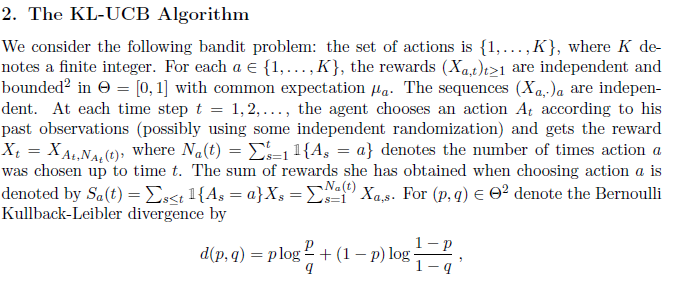

In [1]:
def kullbackl_leibler_bernoulli(p, q):
    return p * np.log(p/q) + (1-p)*np.log((1-p)/(1-q))

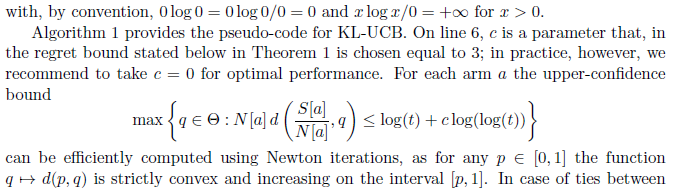

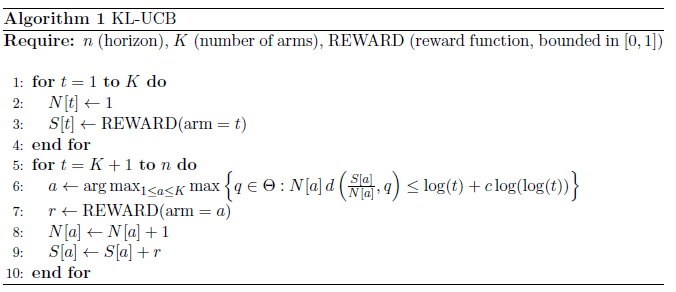

In [78]:
class KL_UCB :
  def __init__(self, K):
    self.K = K
    self.N = np.zeros(self.K)
    self.S = np.zeros(self.K)

  #compute upper confidence bound for specific arm with percision of 0.0001
  def KL_UCB_calculator(self,p, N, t, c=3,):
    q = p
    b = (1 - p) / 2
    while b > 1e-4:
      if self.kullbackl_leibler_bernoulli(p,q+b) <= np.log(t) + c*math.log(np.log(t))/N:
        q += b
      b /= 2;
    return q

  def kullbackl_leibler_bernoulli(self,p, q):	
    if p == 0:
      return 0
    elif q == 0 or p == 1 or q == 1:
      return float('inf')
    else:
      return p * np.log(p/q) + (1-p)*np.log((1-p)/(1-q))

  def choose_arm(self):
      t = np.sum(self.N)
      indices = np.zeros(self.K)
      for k in range(self.K):
          if(self.N[k]==0):
              return k
          indices[k] = self.KL_UCB_calculator(self.S[k]/self.N[k],self.N[k], t)
      selected_arm = np.argmax(indices)
      return selected_arm

  def arm_status_update(self, k, r):
      self.N[k] += 1
      self.S[k] += r

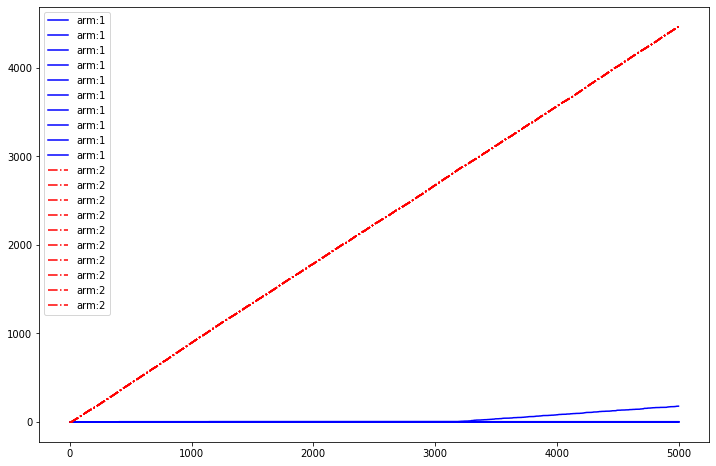

In [92]:
K=2
T=5000
p=[0.1,0.9]

CR1=[]
CR2=[]
TR=[]
for n in range(10):
  klucb = KL_UCB(K)

  actions = np.zeros((K, T), dtype=int)
  rewards = np.zeros((K, T), dtype=int)

  for arm in range(K):
    klucb.N += 1
    klucb.S+= np.random.binomial(1, p[arm])

  for t in range(K,T):
    arm = klucb.choose_arm()
    actions[arm,t] = 1
    rewards[arm,t] = np.random.binomial(1, p[arm])
    klucb.arm_status_update(arm, rewards[arm,t])

  cumulative_rewards = np.cumsum(rewards, axis=1)
  total_rewards = np.sum(cumulative_rewards, axis=0)
  CR1.append(cumulative_rewards[0])
  CR2.append(cumulative_rewards[1])
  TR.append(TR)

fig=plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)
for exp in range(10):
  ax1.plot(CR1[exp],linestyle='-',label=f'arm:{1}',color='blue')
for arm in range(10):
  ax1.plot(CR2[exp],linestyle='dashdot',label=f'arm:{2}',color='red')
ax1.legend(loc='best')
plt.show()

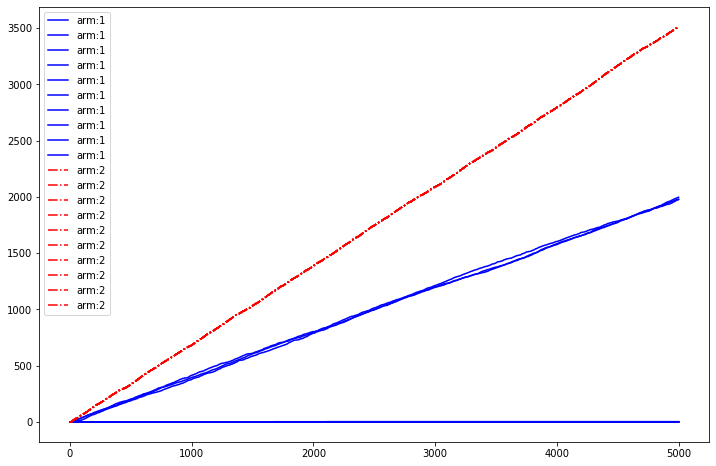

In [96]:
K=2
T=5000
p=[0.4,0.7]
CR1=[]
CR2=[]
TR=[]
for n in range(10):
  klucb = KL_UCB(K)

  actions = np.zeros((K, T), dtype=int)
  rewards = np.zeros((K, T), dtype=int)

  for arm in range(K):
    klucb.N += 1
    klucb.S+= np.random.binomial(1, p[arm])

  for t in range(K,T):
    arm = klucb.choose_arm()
    actions[arm,t] = 1
    rewards[arm,t] = np.random.binomial(1, p[arm])
    klucb.arm_status_update(arm, rewards[arm,t])

  cumulative_rewards = np.cumsum(rewards, axis=1)
  total_rewards = np.sum(cumulative_rewards, axis=0)
  CR1.append(cumulative_rewards[0])
  CR2.append(cumulative_rewards[1])
  TR.append(TR)

fig=plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)
for exp in range(10):
  ax1.plot(CR1[exp],linestyle='-',label=f'arm:{1}',color='blue')
for arm in range(10):
  ax1.plot(CR2[exp],linestyle='dashdot',label=f'arm:{2}',color='red')
ax1.legend(loc='best')
plt.show()

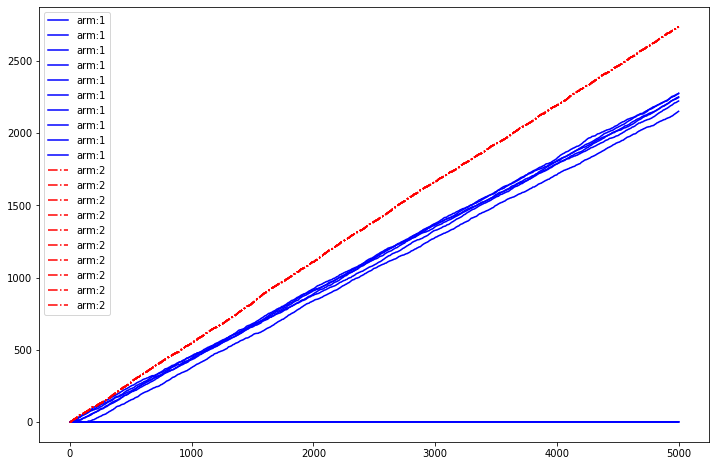

In [94]:
K=2
T=5000
p=[0.45,0.55]
CR1=[]
CR2=[]
TR=[]
for n in range(10):
  klucb = KL_UCB(K)

  actions = np.zeros((K, T), dtype=int)
  rewards = np.zeros((K, T), dtype=int)

  for arm in range(K):
    klucb.N += 1
    klucb.S+= np.random.binomial(1, p[arm])

  for t in range(K,T):
    arm = klucb.choose_arm()
    actions[arm,t] = 1
    rewards[arm,t] = np.random.binomial(1, p[arm])
    klucb.arm_status_update(arm, rewards[arm,t])

  cumulative_rewards = np.cumsum(rewards, axis=1)
  total_rewards = np.sum(cumulative_rewards, axis=0)
  CR1.append(cumulative_rewards[0])
  CR2.append(cumulative_rewards[1])
  TR.append(TR)

fig=plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)
for exp in range(10):
  ax1.plot(CR1[exp],linestyle='-',label=f'arm:{1}',color='blue')
for arm in range(10):
  ax1.plot(CR2[exp],linestyle='dashdot',label=f'arm:{2}',color='red')
ax1.legend(loc='best')
plt.show()